In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm
import random 
import os 
import torch 
from torch import nn 
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("public_data/train.csv") 
data.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [3]:
week_day_map = {} 
for i,d in enumerate(data['요일'].unique()):
    week_day_map[d] = i 
    
data['요일'] = data['요일'].map(week_day_map)

In [5]:
norm = data.iloc[:,1:].max(0) 
data.iloc[:,1:] = data.iloc[:,1:] / norm

In [32]:
data

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,2016-01-02,0.166667,0.015520,0.0658,0.020797,0.264706,0.024437,0.6405,0.000007,0.064389,...,0.060900,0.511068,0.000197,0.398376,0.023032,0.356152,0.000590,0.08056,0.000000,0.000000
2,2016-01-03,0.333333,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,2016-01-04,0.500000,0.273068,0.0956,0.440354,0.280882,0.460735,0.6175,0.001690,0.026130,...,0.457792,0.422302,0.227365,0.386475,0.745976,0.297728,0.001814,0.15540,0.000000,0.000000
4,2016-01-05,0.666667,0.224029,0.0884,0.368802,0.310294,0.416530,0.6065,0.002690,0.025416,...,0.387559,0.383287,0.067041,0.428410,0.278846,0.321334,0.005911,0.11412,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1.000000,0.356409,0.3678,0.532584,0.727941,0.454038,0.4950,0.006813,0.111809,...,0.602816,0.249530,0.128151,0.566868,0.376438,0.505459,0.338341,0.14480,0.740842,0.273500
1729,2020-09-25,0.000000,0.360848,0.3578,0.486887,0.743382,0.412859,0.4775,0.004562,0.135188,...,0.645499,0.231212,0.141775,0.566490,0.436066,0.495279,0.321862,0.14472,0.794687,0.271100
1730,2020-09-26,0.166667,0.318814,0.3520,0.442875,0.790441,0.415758,0.4805,0.002318,0.131764,...,0.727384,0.208633,0.148668,0.578957,0.469269,0.456182,0.349917,0.14764,0.819581,0.265900
1731,2020-09-27,0.333333,0.004874,0.6132,0.009903,0.837500,0.003630,0.5280,0.000145,0.130728,...,0.001711,0.225567,0.000129,0.700227,0.002962,0.479788,0.014572,0.14268,0.025464,0.267475


# Define Hyperparameters

In [7]:
device = torch.device("cuda:0") # GPU 사용
target_n = 21 # 맞춰야하는 품목/품종의 수
learning_rate = 5e-4 # 학습률
BATCH_SIZE = 128 # 배치사이즈
EPOCHS = 50 # 총 eopochs
teacher_forcing = False # 교사강요 설정
n_layers = 3 # rnn레이어 층
dropout = 0.2 # 드롭아웃
window_size = 28 # 인코더 시퀀스 길이
future_size = 28 # 디코더 시퀀스 길이
hidden_dim = 128 # rnn 히든차원
save_path = f'./models/best_model.pt' # 모델 저장 경로

과거 28일을 보고 미래 28일을 예측

In [10]:
x_data = [] 
y_data = [] 
for i in range(data.shape[0]-window_size-future_size): 
    x = data.iloc[i:i+window_size, 1:].to_numpy() 
    y = data.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy() 
    y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가 
    x_data.append(x) 
    y_data.append(np.concatenate([y_0, y], axis = 0)) 
    
x_data = np.array(x_data) 
y_data = np.array(y_data)

In [15]:
x_data.shape, y_data.shape

((1677, 28, 43), (1677, 29, 21))

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, random_state = 42, test_size = 0.1)

In [19]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1509, 28, 43), (168, 28, 43), (1509, 29, 21), (168, 29, 21))

# Define Dataset

In [27]:
class CustomDataset(Dataset): 
    def __init__(self, encoder_input, decoder_input): 
        self.encoder_input = encoder_input
        self.decoder_input = decoder_input 
        
    def __len__(self): 
        return len(self.encoder_input) 
    
    def __getitem__(self, i):  
        return {
            'encoder_input': torch.tensor(self.encoder_input[i], dtype=torch.float32), 
            'decoder_input': torch.tensor(self.decoder_input[i], dtype=torch.float32) 
        }

In [28]:
train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_val, y_val) 

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True) 
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = True) 

In [29]:
sample_batch = next(iter(train_dataloader)) 

In [30]:
sample_batch['encoder_input'].shape, sample_batch['decoder_input'].shape 

(torch.Size([128, 28, 43]), torch.Size([128, 29, 21]))

# Model

In [31]:
class Encoder(nn.Module): 
    def __init__(self, input_dim, hidden_dim, n_layers, dropout): 
        super().__init__() 
        self.n_layers = n_layers 
        self.rnn = nn.GRU(input_dim, hidden_dim, n_layers, dropout=dropout)
        self.dropout = nn.Dropout(dropout) 
        
    def forward(self, inp_seq): 
        inp_seq = inp_seq.permute(1,0,2) 
        outputs, hidden = self.rnn(inp_seq) 
        return outputs, hidden

In [35]:
class BahdanauAttention(nn.Module): 
    def __init__(self, dec_output_dim, units): 
        super(BahdanauAttention, self).__init__() 
        self.W1 = nn.Linear(dec_output_dim, units) 
        self.W2 = nn.Linear(dec_output_dim, units) 
        self.V = nn.Linear(dec_output_dim, 1) 
    
    def forward(self, hidden, enc_output): 
        query_with_time_axis = hidden.unsqueeze(1) 
        score = self.V(torch.tanh(self.W1(query_with_time_axis) + self.W2(enc_output))) 
        attention_weights = torch.softmax(score, axis=1) 
        context_vector = attention_weights * enc_output 
        context_vector = torch.sum(context_vector, dim = 1) 
        return context_vector, attention_weights 

In [36]:
class Decoder(nn.Module): 
    def __init__(self, dec_feature_size, encoder_hidden_dim, output_dim, decoder_hidden_dim, n_layers, dropout, attention):
        super().__init__() 
        self.output_dim = output_dim 
        self.decoder_hidden_dim = decoder_hidden_dim 
        self.n_layers = n_layers 
        self.attention = attention 
        self.layer = nn.Linear(dec_feature_size, encoder_hidden_dim) 
        self.rnn = nn.GRU(encoder_hidden_dim*2, decoder_hidden_dim, n_layers, dropout=dropout) 
        self.fc_out = nn.Linear(hidden_dim, output_dim) 
        self.dropout = nn.Dropout(dropout) 
    
    def forward(self, enc_output, dec_input, hidden): 
        dec_input = self.layer(dec_input) 
        context_vector, attention_weight = self.attention(hidden, enc_output) 
        dec_input = torch.cat([torch.sum(context_vector, dim=0), dec_input], dim=1) 
        dec_input = dec_input.unsqueeze(0) 
        output, hidden = self.rnn(dec_input, hidden) 
        prediction = self.fc_out(output.sum(0)) 
        return prediction, hidden

In [39]:
class Seq2Seq(nn.Module): 
    def __init__(self, encoder, decoder, attention): 
        super().__init__() 
        self.encoder = encoder
        self.decoder = decoder 
    
    def forward(self, encoder_input, decoder_input, teacher_forcing=False):
        batch_size = decoder_input.size(0)
        trg_len = decoder_input.size(1) 
        outputs = torch.zeros(batch_size, trg_len-1, self.decoder.output_dim).to(device) 
        enc_output, hidden = self.encoder(encoder_input) 
        dec_input = decoder_input[:,0] 
        for t in range(1, trg_len): 
            output, hidden = self.decoder(enc_output, dec_input, hidden) 
            outputs[:,t-1] = output
            if teacher_forcing == True: 
                dec_input = decoder_input[:,t] 
            else: 
                dec_input = output 
        
        return outputs 

In [40]:
encoder = Encoder(input_dim = x_data.shape[-1], hidden_dim = hidden_dim, n_layers = n_layers, dropout=dropout) 
attention = BahdanauAttention(dec_output_dim=hidden_dim, units=hidden_dim) 
decoder = Decoder(
    dec_feature_size = target_n, encoder_hidden_dim=hidden_dim, output_dim=target_n, 
    decoder_hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout, 
    attention=attention 
)

model = Seq2Seq(encoder, decoder, attention) 
model = model.to(device)

# Evaluation Function

In [48]:
def my_custom_metric(pred, true): 
    pred = pred[:, [6,13,27]] 
    true = true[:, [6,13,27]] 
    target = torch.where(true!=0) 
    true = true[target] 
    pred = pred[target] 
    score = torch.mean(torch.abs((true-pred)/true)) 
    return score

In [49]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
criterion = nn.L1Loss() # mae 
custom_metric = my_custom_metric

# Train Step

In [50]:
def train_step(batch_item, epoch, batch, training, teacher_forcing):
    encoder_input = batch_item['encoder_input'].to(device)
    decoder_input = batch_item['decoder_input'].to(device)
    if training is True:
        model.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(encoder_input, decoder_input, teacher_forcing)
            loss = criterion(output, decoder_input[:,1:])
            score = custom_metric(output, decoder_input[:,1:])
        loss.backward()
        optimizer.step()
        
        return loss, score
    else:
        model.eval()
        with torch.no_grad():
            output = model(encoder_input, decoder_input, False)
            loss = criterion(output, decoder_input[:,1:])
            score = custom_metric(output, decoder_input[:,1:])
        return loss, score


In [51]:
loss_plot, val_loss_plot = [], []
score_plot, val_score_plot = [], []

for epoch in range(EPOCHS):
    
    print("epoch {}".format(epoch))
    
    total_loss, total_val_loss = 0, 0
    total_score, total_val_score = 0, 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
    training = True
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_score = train_step(batch_item, epoch, batch, training, teacher_forcing)
        total_loss += batch_loss
        total_score += batch_score
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Loss': '{:06f}'.format(batch_loss.item()),
            'Total Loss' : '{:06f}'.format(total_loss/(batch+1)),
            'Score': '{:06f}'.format(batch_score.item()),
            'Total Score' : '{:06f}'.format(total_score/(batch+1)),
        })
    loss_plot.append(total_loss/(batch+1))
    score_plot.append(total_score/(batch+1))
    
    tqdm_dataset = tqdm(enumerate(val_dataloader))
    training = False
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_val_score = train_step(batch_item, epoch, batch, training, teacher_forcing)
        total_val_loss += batch_loss
        total_val_score += batch_val_score
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Val Loss': '{:06f}'.format(batch_loss.item()),
            'Total Val Loss' : '{:06f}'.format(total_val_loss/(batch+1)),
            'Val Score': '{:06f}'.format(batch_val_score.item()),
            'Total Val Score' : '{:06f}'.format(total_val_score/(batch+1)),
        })
    val_loss_plot.append(total_val_loss/(batch+1))
    val_score_plot.append(total_val_score/(batch+1))
    
    if np.min(val_loss_plot) == val_loss_plot[-1]:
        torch.save(model, save_path)


1it [00:00,  7.30it/s, Epoch=1, Loss=0.267926, Total Loss=0.267926, Score=1.004782, Total Score=1.004782]

epoch 0


12it [00:01,  8.44it/s, Epoch=1, Loss=0.138242, Total Loss=0.178004, Score=0.376480, Total Score=0.588541]
2it [00:00, 29.17it/s, Epoch=1, Val Loss=0.126005, Total Val Loss=0.130007, Val Score=0.326199, Total Val Score=0.335177]
1it [00:00,  8.68it/s, Epoch=2, Loss=0.137488, Total Loss=0.137488, Score=0.362635, Total Score=0.362635]

epoch 1


12it [00:01,  9.05it/s, Epoch=2, Loss=0.123409, Total Loss=0.130461, Score=0.529792, Total Score=0.368716]
2it [00:00, 31.29it/s, Epoch=2, Val Loss=0.122719, Total Val Loss=0.122099, Val Score=0.314275, Total Val Score=0.313596]
1it [00:00,  9.12it/s, Epoch=3, Loss=0.124408, Total Loss=0.124408, Score=0.330488, Total Score=0.330488]

epoch 2


12it [00:01,  8.24it/s, Epoch=3, Loss=0.122465, Total Loss=0.121748, Score=0.306282, Total Score=0.336492]
2it [00:00, 24.31it/s, Epoch=3, Val Loss=0.117179, Total Val Loss=0.116600, Val Score=0.275169, Total Val Score=0.282790]
1it [00:00,  7.85it/s, Epoch=4, Loss=0.116988, Total Loss=0.116988, Score=0.300214, Total Score=0.300214]

epoch 3


12it [00:01,  7.92it/s, Epoch=4, Loss=0.114470, Total Loss=0.117537, Score=0.271818, Total Score=0.293988]
2it [00:00, 22.83it/s, Epoch=4, Val Loss=0.111954, Total Val Loss=0.112843, Val Score=0.267442, Total Val Score=0.269565]
1it [00:00,  7.74it/s, Epoch=5, Loss=0.121786, Total Loss=0.121786, Score=0.377126, Total Score=0.377126]

epoch 4


12it [00:01,  7.12it/s, Epoch=5, Loss=0.112012, Total Loss=0.114576, Score=0.271476, Total Score=0.293416]
2it [00:00, 24.12it/s, Epoch=5, Val Loss=0.114556, Total Val Loss=0.112247, Val Score=0.264604, Total Val Score=0.262229]
1it [00:00,  8.21it/s, Epoch=6, Loss=0.110660, Total Loss=0.110660, Score=0.260171, Total Score=0.260171]

epoch 5


12it [00:01,  8.04it/s, Epoch=6, Loss=0.105854, Total Loss=0.111611, Score=0.253998, Total Score=0.278812]
2it [00:00, 24.98it/s, Epoch=6, Val Loss=0.113484, Total Val Loss=0.109940, Val Score=0.256852, Total Val Score=0.257876]
1it [00:00,  8.16it/s, Epoch=7, Loss=0.110699, Total Loss=0.110699, Score=0.272376, Total Score=0.272376]

epoch 6


12it [00:01,  8.03it/s, Epoch=7, Loss=0.109263, Total Loss=0.109218, Score=0.253628, Total Score=0.279803]
2it [00:00, 23.55it/s, Epoch=7, Val Loss=0.107658, Total Val Loss=0.107469, Val Score=0.254021, Total Val Score=0.258046]
1it [00:00,  8.80it/s, Epoch=8, Loss=0.108857, Total Loss=0.108857, Score=0.266009, Total Score=0.266009]

epoch 7


12it [00:01,  8.27it/s, Epoch=8, Loss=0.107576, Total Loss=0.107304, Score=0.241181, Total Score=0.264733]
2it [00:00, 26.86it/s, Epoch=8, Val Loss=0.103238, Total Val Loss=0.104387, Val Score=0.238801, Total Val Score=0.245676]
1it [00:00,  8.15it/s, Epoch=9, Loss=0.105412, Total Loss=0.105412, Score=0.260493, Total Score=0.260493]

epoch 8


12it [00:01,  8.62it/s, Epoch=9, Loss=0.108776, Total Loss=0.105133, Score=0.237136, Total Score=0.252788]
2it [00:00, 27.35it/s, Epoch=9, Val Loss=0.105653, Total Val Loss=0.103404, Val Score=0.241169, Total Val Score=0.235267]
1it [00:00,  8.92it/s, Epoch=10, Loss=0.102980, Total Loss=0.102980, Score=0.231371, Total Score=0.231371]

epoch 9


12it [00:01,  8.93it/s, Epoch=10, Loss=0.102436, Total Loss=0.103560, Score=0.225058, Total Score=0.246166]
2it [00:00, 29.84it/s, Epoch=10, Val Loss=0.100332, Total Val Loss=0.101287, Val Score=0.231406, Total Val Score=0.232742]
1it [00:00,  8.71it/s, Epoch=11, Loss=0.107703, Total Loss=0.107703, Score=0.235780, Total Score=0.235780]

epoch 10


12it [00:01,  8.60it/s, Epoch=11, Loss=0.107363, Total Loss=0.103106, Score=0.233072, Total Score=0.245376]
2it [00:00, 28.35it/s, Epoch=11, Val Loss=0.104876, Total Val Loss=0.102656, Val Score=0.231024, Total Val Score=0.230855]
1it [00:00,  8.74it/s, Epoch=12, Loss=0.104542, Total Loss=0.104542, Score=0.285780, Total Score=0.285780]

epoch 11


12it [00:01,  8.51it/s, Epoch=12, Loss=0.100672, Total Loss=0.101905, Score=0.229893, Total Score=0.238806]
2it [00:00, 28.23it/s, Epoch=12, Val Loss=0.102253, Total Val Loss=0.100558, Val Score=0.232631, Total Val Score=0.227551]
1it [00:00,  8.49it/s, Epoch=13, Loss=0.104944, Total Loss=0.104944, Score=0.226454, Total Score=0.226454]

epoch 12


12it [00:01,  8.40it/s, Epoch=13, Loss=0.095047, Total Loss=0.100599, Score=0.211027, Total Score=0.234571]
2it [00:00, 28.81it/s, Epoch=13, Val Loss=0.098163, Total Val Loss=0.098329, Val Score=0.226983, Total Val Score=0.221403]
1it [00:00,  8.82it/s, Epoch=14, Loss=0.101627, Total Loss=0.101627, Score=0.216980, Total Score=0.216980]

epoch 13


12it [00:01,  8.69it/s, Epoch=14, Loss=0.102949, Total Loss=0.099934, Score=0.220047, Total Score=0.234963]
2it [00:00, 29.33it/s, Epoch=14, Val Loss=0.096871, Total Val Loss=0.097373, Val Score=0.213898, Total Val Score=0.215937]
1it [00:00,  8.16it/s, Epoch=15, Loss=0.099710, Total Loss=0.099710, Score=0.219021, Total Score=0.219021]

epoch 14


12it [00:01,  7.89it/s, Epoch=15, Loss=0.094420, Total Loss=0.098860, Score=0.204614, Total Score=0.229179]
2it [00:00, 25.02it/s, Epoch=15, Val Loss=0.098744, Total Val Loss=0.097576, Val Score=0.218091, Total Val Score=0.215183]
1it [00:00,  8.02it/s, Epoch=16, Loss=0.102210, Total Loss=0.102210, Score=0.212666, Total Score=0.212666]

epoch 15


12it [00:01,  8.37it/s, Epoch=16, Loss=0.099894, Total Loss=0.098550, Score=0.294851, Total Score=0.225946]
2it [00:00, 25.13it/s, Epoch=16, Val Loss=0.091873, Total Val Loss=0.094578, Val Score=0.214724, Total Val Score=0.211491]
1it [00:00,  8.26it/s, Epoch=17, Loss=0.097875, Total Loss=0.097875, Score=0.211508, Total Score=0.211508]

epoch 16


12it [00:01,  8.29it/s, Epoch=17, Loss=0.094476, Total Loss=0.097882, Score=0.271251, Total Score=0.224975]
2it [00:00, 25.98it/s, Epoch=17, Val Loss=0.091955, Total Val Loss=0.094521, Val Score=0.205540, Total Val Score=0.208074]
1it [00:00,  7.63it/s, Epoch=18, Loss=0.095646, Total Loss=0.095646, Score=0.205630, Total Score=0.205630]

epoch 17


12it [00:01,  6.39it/s, Epoch=18, Loss=0.097684, Total Loss=0.096975, Score=0.211080, Total Score=0.219927]
2it [00:00, 23.97it/s, Epoch=18, Val Loss=0.096849, Total Val Loss=0.096090, Val Score=0.210049, Total Val Score=0.211308]
1it [00:00,  8.41it/s, Epoch=19, Loss=0.101080, Total Loss=0.101080, Score=0.212619, Total Score=0.212619]

epoch 18


12it [00:01,  8.53it/s, Epoch=19, Loss=0.097641, Total Loss=0.096845, Score=0.205885, Total Score=0.222122]
2it [00:00, 27.86it/s, Epoch=19, Val Loss=0.092607, Total Val Loss=0.093893, Val Score=0.218741, Total Val Score=0.210996]
1it [00:00,  7.97it/s, Epoch=20, Loss=0.097826, Total Loss=0.097826, Score=0.205059, Total Score=0.205059]

epoch 19


12it [00:01,  8.29it/s, Epoch=20, Loss=0.095154, Total Loss=0.095689, Score=0.307462, Total Score=0.219323]
2it [00:00, 27.06it/s, Epoch=20, Val Loss=0.098664, Total Val Loss=0.095447, Val Score=0.199807, Total Val Score=0.201058]
1it [00:00,  8.22it/s, Epoch=21, Loss=0.098392, Total Loss=0.098392, Score=0.202107, Total Score=0.202107]

epoch 20


12it [00:01,  8.55it/s, Epoch=21, Loss=0.094090, Total Loss=0.095092, Score=0.199521, Total Score=0.214737]
2it [00:00, 29.26it/s, Epoch=21, Val Loss=0.097278, Total Val Loss=0.094709, Val Score=0.189581, Total Val Score=0.195832]
1it [00:00,  7.48it/s, Epoch=22, Loss=0.093260, Total Loss=0.093260, Score=0.195619, Total Score=0.195619]

epoch 21


12it [00:01,  7.63it/s, Epoch=22, Loss=0.093532, Total Loss=0.094531, Score=0.197144, Total Score=0.210133]
2it [00:00, 26.53it/s, Epoch=22, Val Loss=0.092532, Total Val Loss=0.092962, Val Score=0.198352, Total Val Score=0.199440]
1it [00:00,  8.14it/s, Epoch=23, Loss=0.093696, Total Loss=0.093696, Score=0.189314, Total Score=0.189314]

epoch 22


12it [00:01,  8.02it/s, Epoch=23, Loss=0.093931, Total Loss=0.094154, Score=0.191521, Total Score=0.210511]
2it [00:00, 28.41it/s, Epoch=23, Val Loss=0.089774, Total Val Loss=0.091308, Val Score=0.186483, Total Val Score=0.191849]
1it [00:00,  7.98it/s, Epoch=24, Loss=0.095288, Total Loss=0.095288, Score=0.195127, Total Score=0.195127]

epoch 23


12it [00:01,  8.60it/s, Epoch=24, Loss=0.092216, Total Loss=0.093705, Score=0.188300, Total Score=0.208334]
2it [00:00, 29.42it/s, Epoch=24, Val Loss=0.094107, Total Val Loss=0.092715, Val Score=0.195136, Total Val Score=0.193617]
1it [00:00,  8.86it/s, Epoch=25, Loss=0.093613, Total Loss=0.093613, Score=0.186929, Total Score=0.186929]

epoch 24


12it [00:01,  8.17it/s, Epoch=25, Loss=0.088572, Total Loss=0.093069, Score=0.189056, Total Score=0.204620]
2it [00:00, 30.64it/s, Epoch=25, Val Loss=0.090139, Total Val Loss=0.090814, Val Score=0.187580, Total Val Score=0.188899]
1it [00:00,  8.89it/s, Epoch=26, Loss=0.094066, Total Loss=0.094066, Score=0.186403, Total Score=0.186403]

epoch 25


12it [00:01,  8.52it/s, Epoch=26, Loss=0.096748, Total Loss=0.092455, Score=0.184174, Total Score=0.203961]
2it [00:00, 30.11it/s, Epoch=26, Val Loss=0.092104, Total Val Loss=0.091094, Val Score=0.184573, Total Val Score=0.187020]
1it [00:00,  8.79it/s, Epoch=27, Loss=0.094292, Total Loss=0.094292, Score=0.253129, Total Score=0.253129]

epoch 26


12it [00:01,  8.59it/s, Epoch=27, Loss=0.088243, Total Loss=0.091773, Score=0.179293, Total Score=0.198941]
2it [00:00, 28.97it/s, Epoch=27, Val Loss=0.087761, Total Val Loss=0.089299, Val Score=0.178613, Total Val Score=0.183714]
1it [00:00,  7.95it/s, Epoch=28, Loss=0.092415, Total Loss=0.092415, Score=0.254024, Total Score=0.254024]

epoch 27


12it [00:01,  8.17it/s, Epoch=28, Loss=0.089474, Total Loss=0.091378, Score=0.186238, Total Score=0.199744]
2it [00:00, 29.38it/s, Epoch=28, Val Loss=0.090151, Total Val Loss=0.090617, Val Score=0.202738, Total Val Score=0.195021]
1it [00:00,  8.77it/s, Epoch=29, Loss=0.095469, Total Loss=0.095469, Score=0.246443, Total Score=0.246443]

epoch 28


12it [00:01,  8.63it/s, Epoch=29, Loss=0.090932, Total Loss=0.091391, Score=0.187760, Total Score=0.198533]
2it [00:00, 29.73it/s, Epoch=29, Val Loss=0.091231, Total Val Loss=0.090279, Val Score=0.188508, Total Val Score=0.185746]
1it [00:00,  8.61it/s, Epoch=30, Loss=0.091735, Total Loss=0.091735, Score=0.177679, Total Score=0.177679]

epoch 29


12it [00:01,  8.21it/s, Epoch=30, Loss=0.088998, Total Loss=0.090620, Score=0.178322, Total Score=0.196022]
2it [00:00, 29.32it/s, Epoch=30, Val Loss=0.086010, Total Val Loss=0.087851, Val Score=0.171558, Total Val Score=0.177719]
1it [00:00,  8.49it/s, Epoch=31, Loss=0.089767, Total Loss=0.089767, Score=0.169369, Total Score=0.169369]

epoch 30


12it [00:01,  7.41it/s, Epoch=31, Loss=0.087284, Total Loss=0.089887, Score=0.172542, Total Score=0.192706]
2it [00:00, 17.63it/s, Epoch=31, Val Loss=0.086031, Total Val Loss=0.087990, Val Score=0.190213, Total Val Score=0.185238]
1it [00:00,  7.41it/s, Epoch=32, Loss=0.091538, Total Loss=0.091538, Score=0.179498, Total Score=0.179498]

epoch 31


12it [00:01,  7.89it/s, Epoch=32, Loss=0.085676, Total Loss=0.089328, Score=0.172844, Total Score=0.192580]
2it [00:00, 28.39it/s, Epoch=32, Val Loss=0.089802, Total Val Loss=0.088499, Val Score=0.174118, Total Val Score=0.176302]
1it [00:00,  8.68it/s, Epoch=33, Loss=0.089990, Total Loss=0.089990, Score=0.239009, Total Score=0.239009]

epoch 32


12it [00:01,  8.55it/s, Epoch=33, Loss=0.087241, Total Loss=0.088736, Score=0.171393, Total Score=0.188099]
2it [00:00, 26.77it/s, Epoch=33, Val Loss=0.083656, Total Val Loss=0.086115, Val Score=0.180331, Total Val Score=0.176957]
1it [00:00,  8.74it/s, Epoch=34, Loss=0.087616, Total Loss=0.087616, Score=0.169750, Total Score=0.169750]

epoch 33


12it [00:01,  8.74it/s, Epoch=34, Loss=0.087614, Total Loss=0.088407, Score=0.174997, Total Score=0.188237]
2it [00:00, 24.92it/s, Epoch=34, Val Loss=0.084617, Total Val Loss=0.086218, Val Score=0.175400, Total Val Score=0.174333]
1it [00:00,  8.11it/s, Epoch=35, Loss=0.088978, Total Loss=0.088978, Score=0.234252, Total Score=0.234252]

epoch 34


12it [00:02,  4.51it/s, Epoch=35, Loss=0.086601, Total Loss=0.088045, Score=0.163444, Total Score=0.184637]
2it [00:00, 27.82it/s, Epoch=35, Val Loss=0.081559, Total Val Loss=0.084800, Val Score=0.159271, Total Val Score=0.168120]
1it [00:00,  7.12it/s, Epoch=36, Loss=0.090208, Total Loss=0.090208, Score=0.167658, Total Score=0.167658]

epoch 35


12it [00:04,  2.95it/s, Epoch=36, Loss=0.084056, Total Loss=0.087566, Score=0.163214, Total Score=0.183922]
2it [00:00, 29.67it/s, Epoch=36, Val Loss=0.084531, Total Val Loss=0.085540, Val Score=0.161794, Total Val Score=0.166456]
1it [00:00,  8.77it/s, Epoch=37, Loss=0.088803, Total Loss=0.088803, Score=0.223779, Total Score=0.223779]

epoch 36


12it [00:02,  4.85it/s, Epoch=37, Loss=0.085647, Total Loss=0.086922, Score=0.168745, Total Score=0.179929]
2it [00:00, 28.57it/s, Epoch=37, Val Loss=0.081340, Total Val Loss=0.083995, Val Score=0.165147, Total Val Score=0.166086]
1it [00:00,  8.80it/s, Epoch=38, Loss=0.083354, Total Loss=0.083354, Score=0.161483, Total Score=0.161483]

epoch 37


12it [00:01,  8.69it/s, Epoch=38, Loss=0.085620, Total Loss=0.086554, Score=0.168162, Total Score=0.180306]
2it [00:00, 28.27it/s, Epoch=38, Val Loss=0.084142, Total Val Loss=0.084782, Val Score=0.153639, Total Val Score=0.162438]
1it [00:00,  8.58it/s, Epoch=39, Loss=0.089289, Total Loss=0.089289, Score=0.288244, Total Score=0.288244]

epoch 38


12it [00:01,  7.85it/s, Epoch=39, Loss=0.086377, Total Loss=0.086245, Score=0.164238, Total Score=0.179715]
2it [00:00, 29.39it/s, Epoch=39, Val Loss=0.086282, Total Val Loss=0.085241, Val Score=0.181174, Total Val Score=0.170337]
1it [00:00,  8.82it/s, Epoch=40, Loss=0.085937, Total Loss=0.085937, Score=0.223777, Total Score=0.223777]

epoch 39


12it [00:01,  8.45it/s, Epoch=40, Loss=0.080667, Total Loss=0.085774, Score=0.157260, Total Score=0.177952]
2it [00:00, 24.56it/s, Epoch=40, Val Loss=0.080829, Total Val Loss=0.083239, Val Score=0.158849, Total Val Score=0.163195]
1it [00:00,  7.85it/s, Epoch=41, Loss=0.085915, Total Loss=0.085915, Score=0.161993, Total Score=0.161993]

epoch 40


12it [00:01,  7.54it/s, Epoch=41, Loss=0.085899, Total Loss=0.085654, Score=0.162020, Total Score=0.177456]
2it [00:00, 29.49it/s, Epoch=41, Val Loss=0.080052, Total Val Loss=0.082746, Val Score=0.152553, Total Val Score=0.159411]
1it [00:00,  8.15it/s, Epoch=42, Loss=0.086258, Total Loss=0.086258, Score=0.160218, Total Score=0.160218]

epoch 41


12it [00:02,  5.36it/s, Epoch=42, Loss=0.083780, Total Loss=0.085151, Score=0.231369, Total Score=0.175869]
2it [00:00, 29.43it/s, Epoch=42, Val Loss=0.087778, Total Val Loss=0.085000, Val Score=0.179258, Total Val Score=0.168313]
1it [00:00,  8.73it/s, Epoch=43, Loss=0.084049, Total Loss=0.084049, Score=0.160950, Total Score=0.160950]

epoch 42


12it [00:02,  4.86it/s, Epoch=43, Loss=0.083331, Total Loss=0.084570, Score=0.160347, Total Score=0.173341]
2it [00:00, 29.92it/s, Epoch=43, Val Loss=0.075781, Total Val Loss=0.080408, Val Score=0.155666, Total Val Score=0.156760]
1it [00:00,  8.66it/s, Epoch=44, Loss=0.082416, Total Loss=0.082416, Score=0.159341, Total Score=0.159341]

epoch 43


12it [00:04,  2.55it/s, Epoch=44, Loss=0.081327, Total Loss=0.084080, Score=0.235752, Total Score=0.174230]
2it [00:00, 15.78it/s, Epoch=44, Val Loss=0.084869, Total Val Loss=0.083680, Val Score=0.162603, Total Val Score=0.160972]
1it [00:00,  6.47it/s, Epoch=45, Loss=0.083312, Total Loss=0.083312, Score=0.155806, Total Score=0.155806]

epoch 44


12it [00:06,  1.76it/s, Epoch=45, Loss=0.083818, Total Loss=0.083887, Score=0.239562, Total Score=0.173899]
2it [00:00, 22.97it/s, Epoch=45, Val Loss=0.081775, Total Val Loss=0.082258, Val Score=0.152424, Total Val Score=0.157031]
1it [00:00,  5.39it/s, Epoch=46, Loss=0.082545, Total Loss=0.082545, Score=0.151732, Total Score=0.151732]

epoch 45


12it [00:02,  4.78it/s, Epoch=46, Loss=0.086407, Total Loss=0.083666, Score=0.159516, Total Score=0.169355]
2it [00:00, 17.21it/s, Epoch=46, Val Loss=0.082318, Total Val Loss=0.082217, Val Score=0.150418, Total Val Score=0.154809]
1it [00:00,  6.06it/s, Epoch=47, Loss=0.082762, Total Loss=0.082762, Score=0.151527, Total Score=0.151527]

epoch 46


12it [00:01,  6.25it/s, Epoch=47, Loss=0.085637, Total Loss=0.083324, Score=0.151932, Total Score=0.168454]
2it [00:00, 27.46it/s, Epoch=47, Val Loss=0.082684, Total Val Loss=0.081960, Val Score=0.155948, Total Val Score=0.155178]
1it [00:00,  8.64it/s, Epoch=48, Loss=0.080836, Total Loss=0.080836, Score=0.145467, Total Score=0.145467]

epoch 47


12it [00:01,  7.82it/s, Epoch=48, Loss=0.083984, Total Loss=0.082890, Score=0.145383, Total Score=0.165441]
2it [00:00, 18.13it/s, Epoch=48, Val Loss=0.082711, Total Val Loss=0.081652, Val Score=0.167445, Total Val Score=0.158005]
1it [00:00,  7.34it/s, Epoch=49, Loss=0.079405, Total Loss=0.079405, Score=0.206630, Total Score=0.206630]

epoch 48


12it [00:01,  8.37it/s, Epoch=49, Loss=0.079783, Total Loss=0.082431, Score=0.223235, Total Score=0.165143]
2it [00:00, 28.11it/s, Epoch=49, Val Loss=0.077825, Total Val Loss=0.079807, Val Score=0.149297, Total Val Score=0.151431]
1it [00:00,  8.76it/s, Epoch=50, Loss=0.082471, Total Loss=0.082471, Score=0.150900, Total Score=0.150900]

epoch 49


12it [00:01,  8.66it/s, Epoch=50, Loss=0.082251, Total Loss=0.082110, Score=0.149114, Total Score=0.162739]
2it [00:00, 29.64it/s, Epoch=50, Val Loss=0.080487, Total Val Loss=0.080322, Val Score=0.145877, Total Val Score=0.148762]


# Train Result

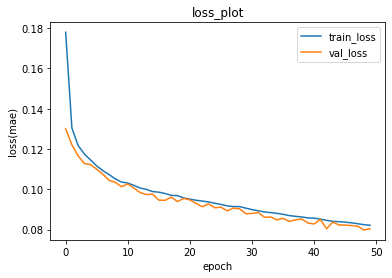

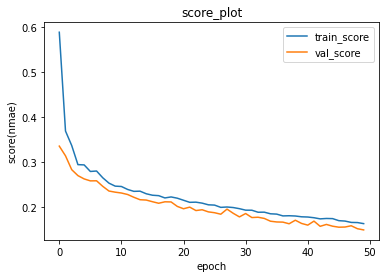

In [52]:
plt.plot(loss_plot, label='train_loss')
plt.plot(val_loss_plot, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss(mae)')
plt.title('loss_plot')
plt.legend()
plt.show()

plt.plot(score_plot, label='train_score')
plt.plot(val_score_plot, label='val_score')
plt.xlabel('epoch')
plt.ylabel('score(nmae)')
plt.title('score_plot')
plt.legend()
plt.show()


In [53]:
test_model = torch.load(save_path)
test_model = test_model.to(device)

In [54]:
def predict(encoder_input):
    test_model.train()
    encoder_input = encoder_input.to(device)
    decoder_input = torch.zeros([1, future_size+1, target_n], dtype=torch.float32).to(device)
    with torch.no_grad():
        output = test_model(encoder_input, decoder_input, False)
    return output.cpu()


In [56]:
submission = pd.read_csv('sample_submission.csv')

public_date_list = submission[submission['예측대상일자'].str.contains('2020')]['예측대상일자'].str.split('+').str[0].unique() 



In [58]:
outputs = []
troch_norm = torch.tensor(norm.to_numpy()[2::2])
for date in public_date_list:
    test_df = pd.read_csv(f'public_data/test_files/test_{date}.csv')
    data = pd.read_csv('public_data/train.csv')
    data = pd.concat([data, test_df]).iloc[-window_size:]
    
    week_day_map = {}
    for i, d in enumerate(data['요일'].unique()):
        week_day_map[d] = i
    data['요일'] = data['요일'].map(week_day_map)
    data = data.iloc[:,1:]/norm
    
    encoder_input = torch.tensor(data.to_numpy(), dtype=torch.float32)
    encoder_input = encoder_input.unsqueeze(0)
    output = predict(encoder_input)*troch_norm
    
    idx = submission[submission['예측대상일자'].str.contains(date)].index
    submission.loc[idx, '배추_가격(원/kg)':] = output[0,[6,13,27]].numpy()

In [59]:
submission

,예측대상일자,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,2020-09-29+1week,721.262768,1151.425524,1085.619807,22205.184001,5107.936776,1912.256668,1310.489631,1373.222821,6841.336470,...,1488.916464,4246.405673,2529.635906,1824.883870,4395.847943,4737.101472,2549.350986,2240.288625,3805.322945,7024.998069
1,2020-09-29+2week,755.218789,980.346909,1083.718538,17485.364401,5151.911671,1861.040347,1118.632704,1247.585582,5932.773471,...,1646.757871,4853.798976,2589.343786,1789.264099,4643.923950,3076.522218,2449.268632,2050.477375,3718.629479,6478.184462
2,2020-09-29+4week,869.424790,847.794456,1056.710005,18998.865627,4898.591450,1777.475279,988.617877,1269.309343,5833.566536,...,1800.350212,5274.428100,2599.436522,1671.288574,4604.940678,1870.010357,2392.472383,1841.738105,3621.167690,4847.221076
3,2020-09-30+1week,670.602098,1268.034153,1153.078079,18816.459280,4885.435841,2130.905637,1533.638438,1442.280898,7949.867856,...,1746.656634,5155.423977,2595.144987,2061.586276,4624.939051,5816.106336,2757.735536,2441.836690,4038.110003,6773.374081
4,2020-09-30+2week,675.509945,1102.542191,1151.970625,19224.502283,5045.595035,2035.378208,1337.705883,1340.580595,7789.935670,...,1823.007166,6182.803075,2679.019928,2059.784717,4867.978347,4098.087689,2674.687355,2415.411840,3879.119828,5403.242707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2021-11-03+2week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
224,2021-11-03+4week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
225,2021-11-04+1week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
226,2021-11-04+2week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
submission.to_csv('seq2seq_baseline.csv',index=False)